In [1]:
!pip install -q keras
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Add,Activation,Convolution2D,MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.image as mpimg
import cv2

In [2]:
root_dir='/content/drive/MyDrive/Dataset/flowers'

In [3]:
print(os.listdir(root_dir))
daisy_dir = os.path.join(root_dir,'daisy')
daisy_fnames = os.listdir(daisy_dir)
dandelion_dir = os.path.join(root_dir,'dandelion')
dandelion_fnames = os.listdir(dandelion_dir)
sunflower_dir = os.path.join(root_dir,'sunflower')
sunflower_fnames = os.listdir(sunflower_dir)
tulip_dir = os.path.join(root_dir,'tulip')
tulip_fnames = os.listdir(tulip_dir)
rose_dir = os.path.join(root_dir,'rose')
rose_fnames = os.listdir(rose_dir)

['daisy', 'rose', 'sunflower', 'dandelion', 'tulip']


(221, 320, 3)


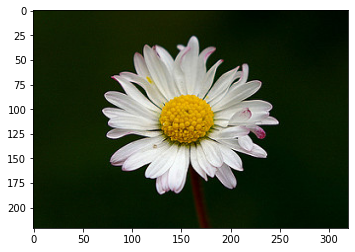

In [4]:
daisy_dir = os.path.join(root_dir,'daisy')
daisy_fnames = os.listdir(daisy_dir)
img = mpimg.imread(os.path.join(daisy_dir,daisy_fnames[2]))
plt.imshow(img);
print(img.shape)

In [5]:
print(f'Daisy Files: {daisy_fnames[:10]}')
print(f'Sunflower Files: {sunflower_fnames[:10]}')

Daisy Files: ['11870378973_2ec1919f12.jpg', '1354396826_2868631432_m.jpg', '13901930939_a7733c03f0_n.jpg', '11834945233_a53b7a92ac_m.jpg', '12348343085_d4c396e5b5_m.jpg', '10466290366_cc72e33532.jpg', '12585131704_0f64b17059_m.jpg', '10559679065_50d2b16f6d.jpg', '13491959645_2cd9df44d6_n.jpg', '14221848160_7f0a37c395.jpg']
Sunflower Files: ['13568621944_d575324b8c_n.jpg', '1244774242_25a20d99a9.jpg', '1022552036_67d33d5bd8_n.jpg', '13096076565_72c2c60875_n.jpg', '1267876087_a1b3c63dc9.jpg', '10386525005_fd0b7d6c55_n.jpg', '1379256773_bb2eb0d95b_n.jpg', '1217254584_4b3028b93d.jpg', '12471791574_bb1be83df4.jpg', '1043442695_4556c4c13d_n.jpg']


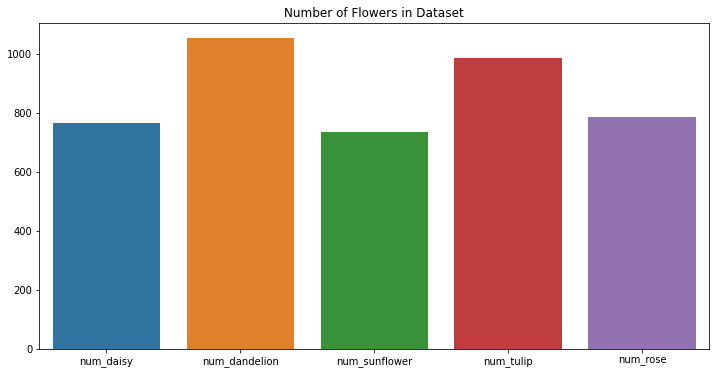

In [6]:
num_daisy = len(daisy_fnames)
num_dandelion = len(dandelion_fnames)
num_sunflower = len(sunflower_fnames)
num_tulip = len(tulip_fnames)
num_rose = len(rose_fnames)

df = pd.DataFrame(data = np.array([[num_daisy,num_dandelion,num_sunflower,num_tulip,num_rose]]),columns=['num_daisy','num_dandelion','num_sunflower','num_tulip','num_rose'])
plt.figure(figsize=(12,6))
sns.barplot(data=df)
plt.title('Number of Flowers in Dataset');

(221, 240, 3)


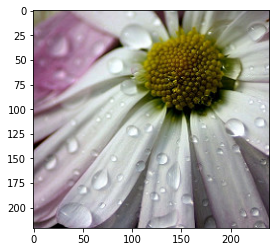

In [7]:
img = mpimg.imread(os.path.join(daisy_dir,daisy_fnames[4]))
plt.imshow(img);
print(img.shape)

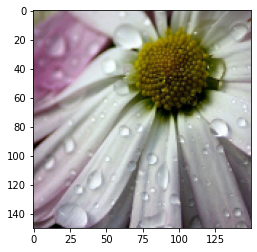

In [8]:
img = cv2.resize(img,(150,150))
plt.imshow(img)

In [9]:
X = []
y = []
def make_set(flower_name):
    for i in range(len(os.listdir(os.path.join(root_dir,flower_name)))):
        img = mpimg.imread(os.path.join(root_dir,flower_name,os.listdir(os.path.join(root_dir,flower_name))[i]))
        img = cv2.resize(img,(150,150))
        X.append(img)
        y.append(flower_name)
    return X,y

In [10]:
X,y = make_set('daisy')
X,y = make_set('dandelion')
X,y = make_set('sunflower')
X,y = make_set('tulip')
X,y = make_set('rose')
y.count('sunflower')

733

In [11]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(4317, 150, 150, 3)
(4317,)


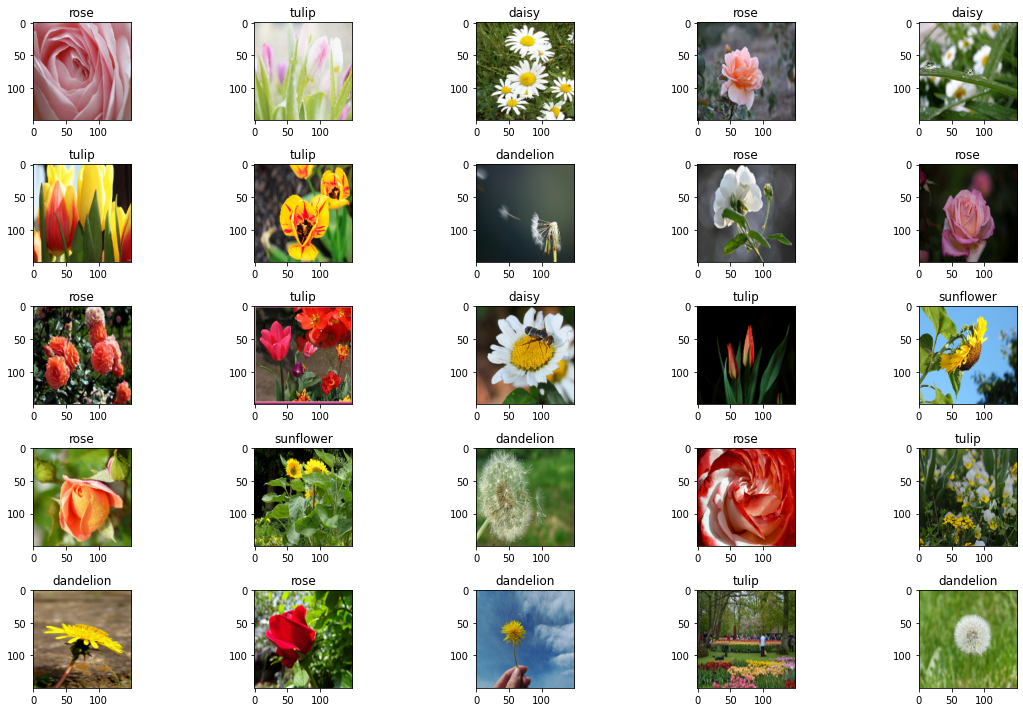

In [12]:
plt.figure(figsize=(16,10))
for i in range(25):
    plt.subplot(5,5,1+i)
    ran_idx = np.random.choice(len(X))
    plt.imshow(X[ran_idx])
    plt.title(y[ran_idx])
plt.tight_layout()
plt.show()

In [13]:
X = X/255
y[y=='daisy']=0
y[y=='dandelion']=1
y[y=='sunflower']=2
y[y=='tulip']=3
y[y=='rose']=4
# print(y[10],y[25],y[999])
y= np.array(y,dtype=int)
y = y.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=75)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3453, 150, 150, 3)
(864, 150, 150, 3)
(3453, 1)
(864, 1)


In [15]:
model1 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(15, 3, activation='relu', input_shape=(150,150,3))) # channel dimensions = 148x148x15    
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model1.add(Convolution2D(32, 5, activation='relu'))                        # channel dimensions = 144x144x32    
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(64, 5, activation='relu'))                       # channel dimensions = 140x140x64    
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, activation='relu'))                        # channel dimensions = 140x140x32   
model1.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 70x70x32

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(64, 3, activation='relu'))                      # channel dimensions = 68x68x64    
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(128, 5, activation='relu'))                      # channel dimensions = 64x64x128  
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Convolution2D(64, 5, activation='relu'))                      # channel dimensions = 60x60x64  
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, activation='relu'))                     # channel dimensions = 60x60x32 
model1.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 30x30x32  

model1.add(Convolution2D(64, 3, activation='relu'))                      # channel dimensions = 28x28x64  
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(Convolution2D(128, 5, activation='relu'))                      # channel dimensions = 24x24x128 
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(Convolution2D(128, 3, activation='relu'))                      # channel dimensions = 22x22x128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(Convolution2D(64, 5, activation='relu'))                     # channel dimensions = 18x18x64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(64, 3, activation='relu'))                     # channel dimensions = 16x16x64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 5, activation='relu'))                     # channel dimensions = 12x12x32  
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(15, 3, activation='relu'))                     # channel dimensions = 10x10x10
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(Convolution2D(10, 3, activation='relu'))                     # channel dimensions = 8x8x10
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model1.add(Convolution2D(5, 8))                                         # using 8x8 kernel to see the complete image  # channel dimensions = 1x1x5

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model1.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 15)      420       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 15)      60        
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 15)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 32)      12032     
_________________________________________________________________
batch_normalization_1 (Batch (None, 144, 144, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 144, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 140, 140, 64)      5

In [16]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
trained_model = model1.fit(x=X_train,y=y_train, batch_size=128,epochs=100,validation_data=(X_test,y_test),steps_per_epoch=len(X_train)//128,verbose=1)

Epoch 1/100
26/26 [==============================] - 51s 807ms/step - loss: 2.1359 - accuracy: 0.2004 - val_loss: 2.2352 - val_accuracy: 0.2350
Epoch 2/100
26/26 [==============================] - 26s 634ms/step - loss: 1.7733 - accuracy: 0.2636 - val_loss: 1.6932 - val_accuracy: 0.2431
Epoch 3/100
26/26 [==============================] - 17s 637ms/step - loss: 1.4977 - accuracy: 0.3933 - val_loss: 1.8955 - val_accuracy: 0.2234
Epoch 4/100
26/26 [==============================] - 17s 639ms/step - loss: 1.3627 - accuracy: 0.4404 - val_loss: 1.8717 - val_accuracy: 0.1921
Epoch 5/100
26/26 [==============================] - 17s 643ms/step - loss: 1.2959 - accuracy: 0.4672 - val_loss: 1.9568 - val_accuracy: 0.1898
Epoch 6/100
26/26 [==============================] - 17s 646ms/step - loss: 1.2298 - accuracy: 0.4913 - val_loss: 4.1854 - val_accuracy: 0.2396
Epoch 7/100
26/26 [==============================] - 17s 646ms/step - loss: 1.1837 - accuracy: 0.5001 - val_loss: 3.0855 - val_accuracy:

In [18]:
pred = model1.predict(X_train[4].reshape(1,150,150,3)).argmax()
pred

2

[2]


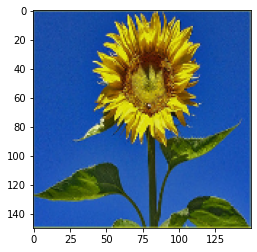

In [19]:
print(y_train[4])
plt.imshow(X_train[4]);

In [20]:
pred = model1.predict(X_test[10].reshape(1,150,150,3)).argmax()
pred

2

[2]


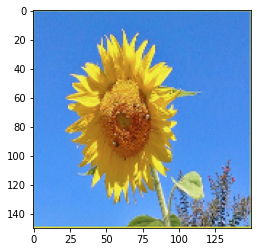

In [21]:
print(y_test[10])
plt.imshow(X_test[10]);

In [30]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

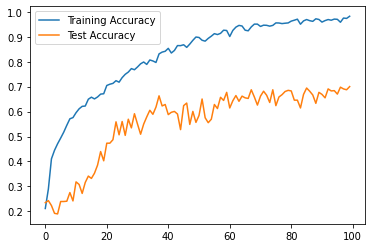

In [32]:
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Test Accuracy')
plt.legend()

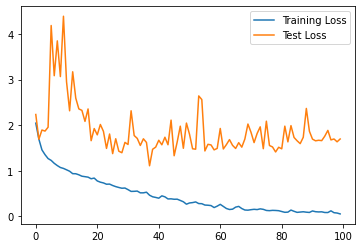

In [33]:
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Test Loss')
plt.legend()

In [36]:
model1.save("Flower_class_70_val_acc.h5")

In [40]:
from keras.models import load_model
model2=load_model("/content/Flower_class_70_val_acc.h5")

In [41]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 15)      420       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 15)      60        
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 15)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 32)      12032     
_________________________________________________________________
batch_normalization_1 (Batch (None, 144, 144, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 144, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 140, 140, 64)      5